# Kaggle's Heart Disease UCI Dataset Project

##### In this project I will overview and analyse the Heart Disease Dataset

##### Will start by doing some features correlations, going through some quick plot visualizations, analysing them and getting some conclusions. And then will proceed to apply several ML models to see which yields better results and finishing with a basic Classifier model:

* ##### <font color='#F16745'>Logistic Regression</font>
* ##### <font color='#FFC65D'>KNN Classifier</font>
* ##### <font color='#7BC8A4'>Decision Tree</font>
* ##### <font color='#4CC3D9'>Random Forest Classifier</font>
* ##### <font color='#93648D'>Support Vector Machine (SVM)</font>
* ##### <font color='#404040'>Naive Bayes</font>


### Data description:¶
- age - age in years 
- sex - (1 = male; 0 = female) 
- cp - chest pain type
    - Value 1: typical angina 
    - Value 2: atypical angina 
    - Value 3: non-anginal pain 
    - Value 4: asymptomatic     
- trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
- chol - serum cholestoral in mg/dl 
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
- restecg - resting electrocardiographic results 
- thalach - maximum heart rate achieved 
- exang - exercise induced angina (1 = yes; 0 = no) 
- oldpeak - ST depression induced by exercise relative to rest 
- slope - the slope of the peak exercise ST segment
    - Value 1: upsloping 
    - Value 2: flat 
    - Value 3: downsloping 
- ca - number of major vessels (0-3) colored by flourosopy 
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
- target - have disease or not (1=yes, 0=no)

#### Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading Data

In [2]:
HeartDf = pd.read_csv("/content/drive/MyDrive/Electro-pi/heart.csv")
HeartDf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Check if there is any missing data

In [3]:
HeartDf.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Diseased V.S. Healthy Persons

Text(0, 0.5, 'Percentage')

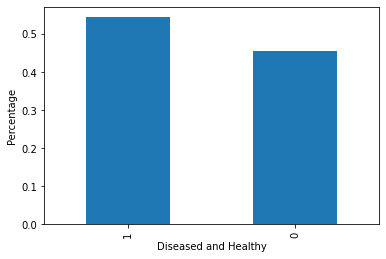

In [4]:
HeartDf.target.value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Diseased and Healthy')
plt.ylabel('Percentage')

##### It seems that about 54% are Diseased and 46% are Healthy

#### Dataset details

In [5]:
HeartDf.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Creating a correlation

In [6]:
df_corr = HeartDf.corr()

##### Visualize correlation results

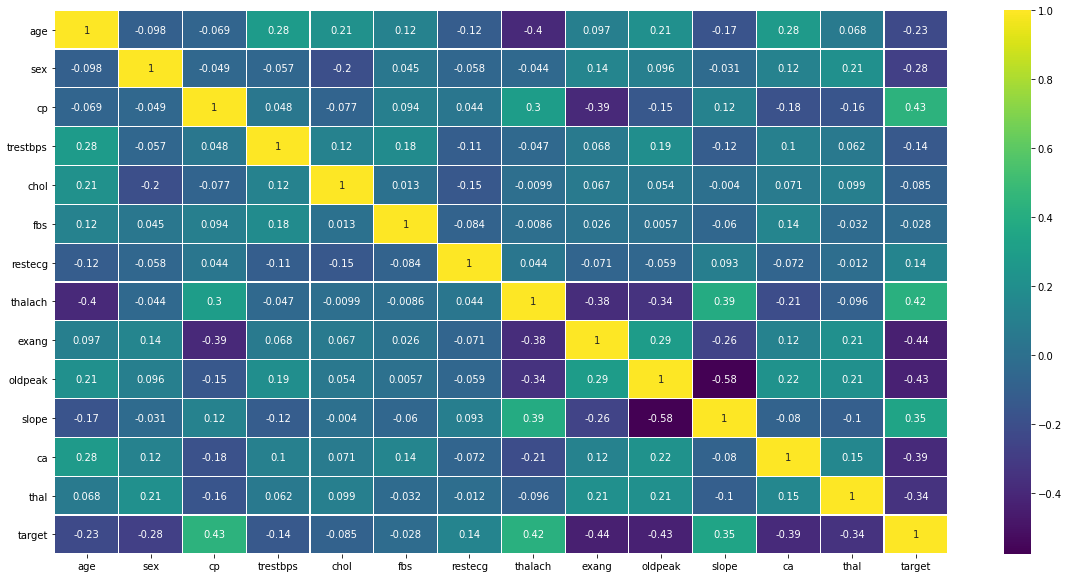

In [7]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, cmap="viridis", linecolor="w", linewidths=0.1, annot=True)

###### Correlation analysis

* What I can conclude is that most correlated features (from the 14 features used including the 'target' column) are:

    * **cp** - **target** (Positive Correlation)
    * **thalach** - **target** (Positive Correlation)
    * **thalach** - **slope** (Positive Correlation)
    * **age** - **target** (Negative Correlation)
    * **sex** - **target** (Negative Correlation)
    * **exang** - **target** (Negative Correlation)
    * **oldpeak** - **target** (Negative Correlation)
    * **ca** - **target** (Negative Correlation)
    * **thal** - **target** (Negative Correlation)

* Let's start by analysing and plotting some visualizations of those correlated features

#### Pair Plot

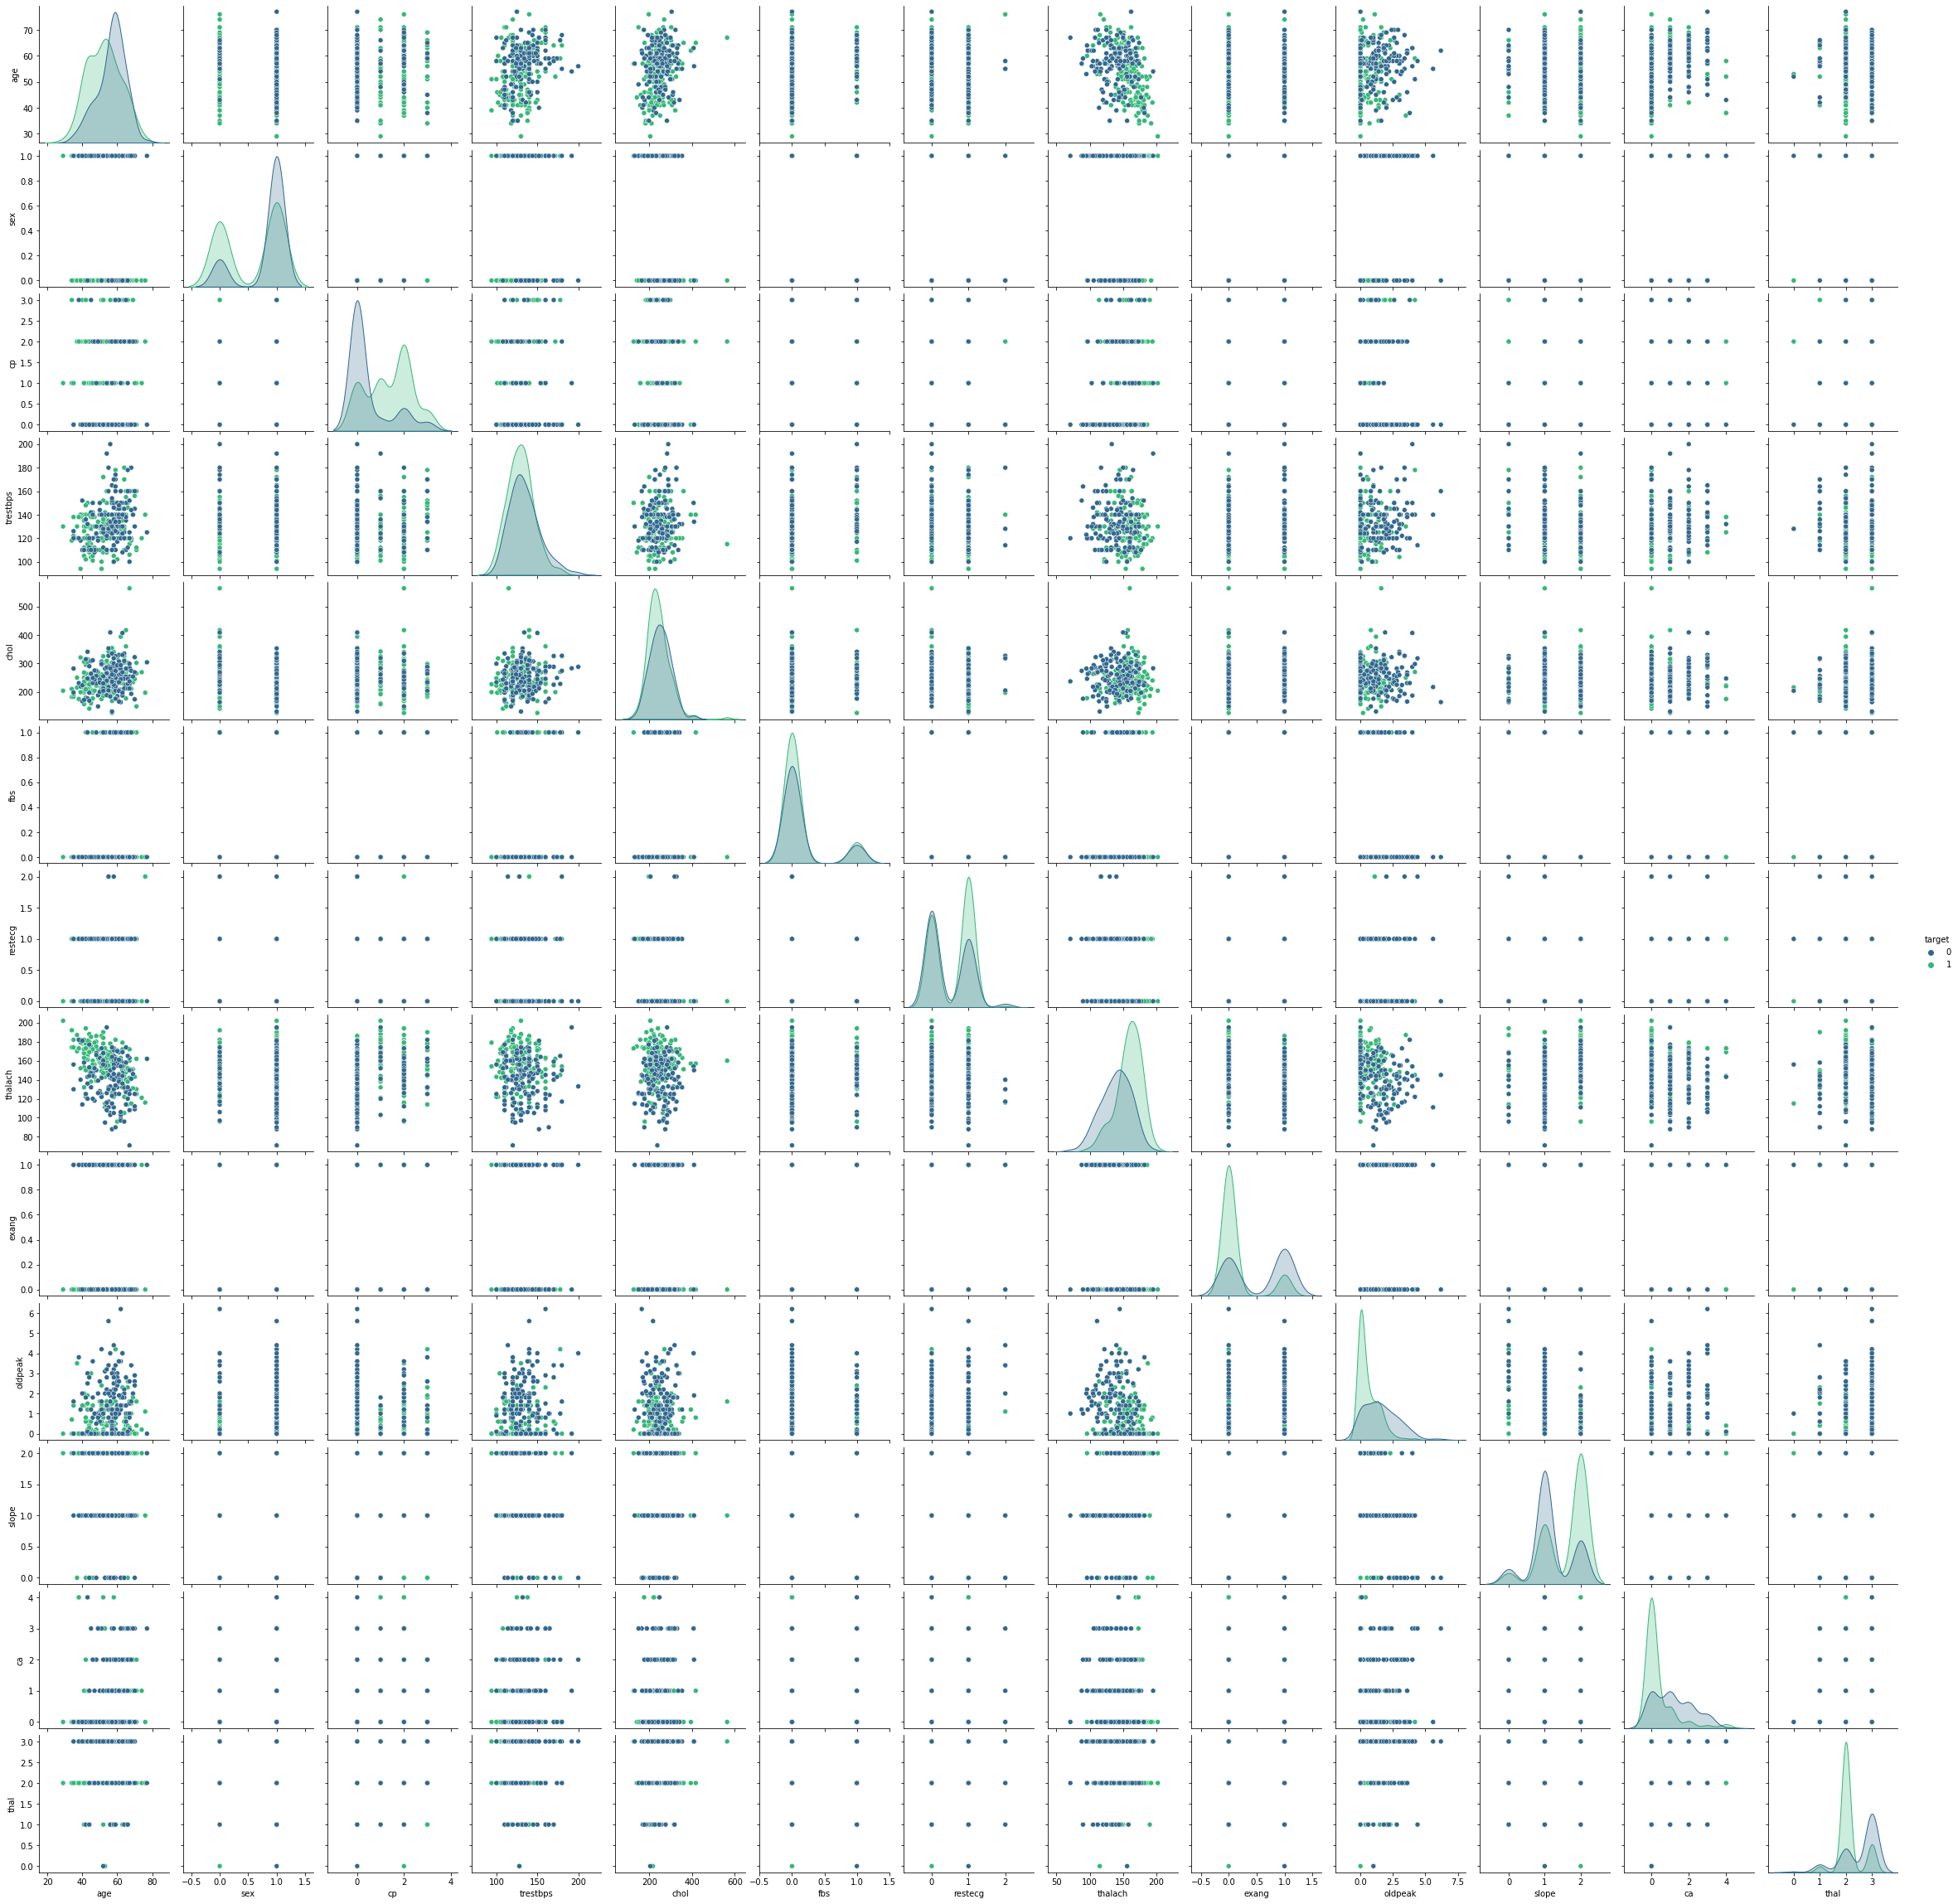

In [8]:
sns.pairplot(HeartDf, hue="target", palette="viridis")

#### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1517e90d0>,
      dtype=object)

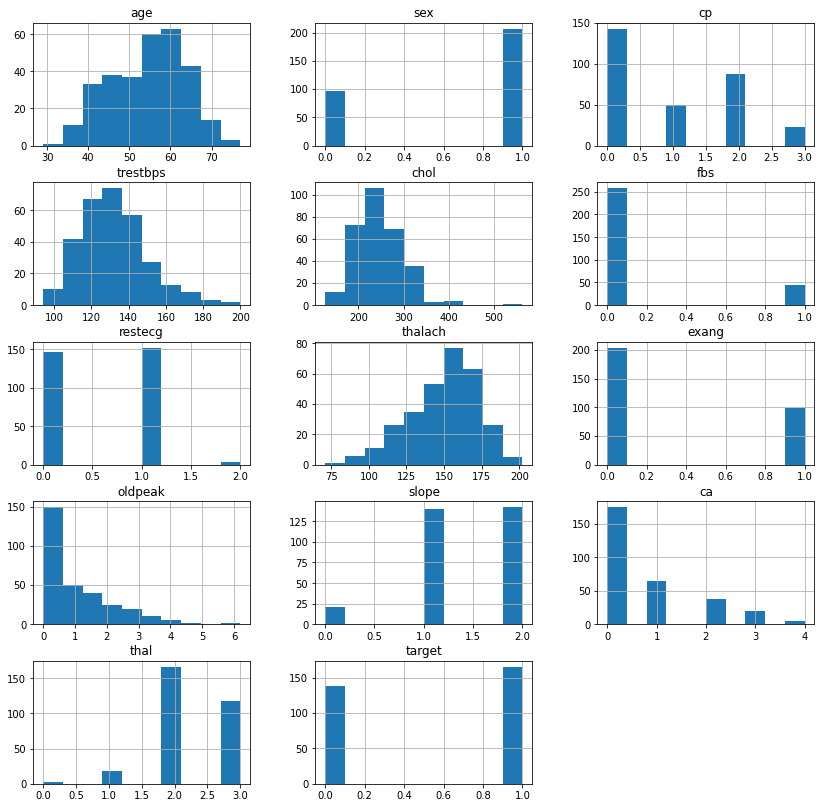

In [9]:
HeartDf.hist(figsize=(14, 14), layout=(5, 3))

#### Box PLot

age            AxesSubplot(0.125,0.749828;0.227941x0.130172)
sex         AxesSubplot(0.398529,0.749828;0.227941x0.130172)
cp          AxesSubplot(0.672059,0.749828;0.227941x0.130172)
trestbps       AxesSubplot(0.125,0.593621;0.227941x0.130172)
chol        AxesSubplot(0.398529,0.593621;0.227941x0.130172)
fbs         AxesSubplot(0.672059,0.593621;0.227941x0.130172)
restecg        AxesSubplot(0.125,0.437414;0.227941x0.130172)
thalach     AxesSubplot(0.398529,0.437414;0.227941x0.130172)
exang       AxesSubplot(0.672059,0.437414;0.227941x0.130172)
oldpeak        AxesSubplot(0.125,0.281207;0.227941x0.130172)
slope       AxesSubplot(0.398529,0.281207;0.227941x0.130172)
ca          AxesSubplot(0.672059,0.281207;0.227941x0.130172)
thal              AxesSubplot(0.125,0.125;0.227941x0.130172)
target         AxesSubplot(0.398529,0.125;0.227941x0.130172)
dtype: object

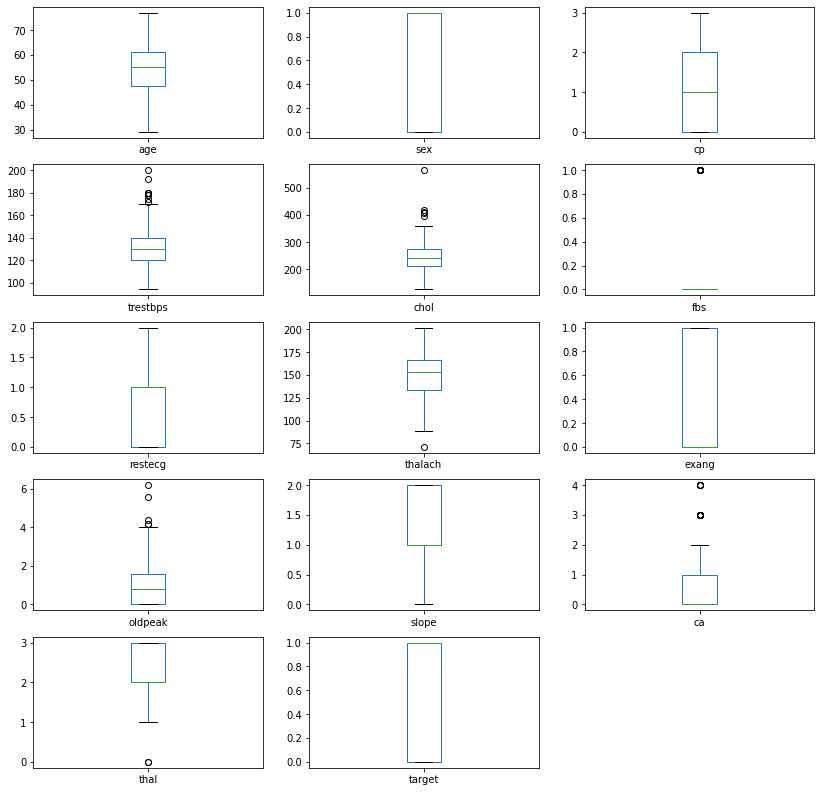

In [10]:
HeartDf.plot(kind="box", subplots=True, figsize=(14, 14), layout=(5, 3))

#### Some Relations

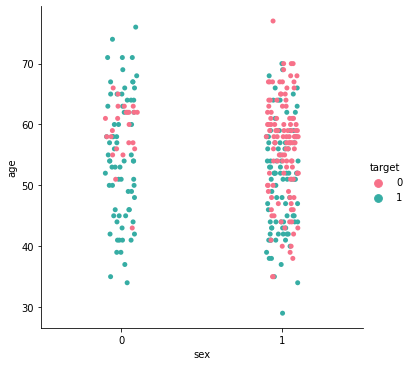

In [11]:
sns.catplot(data=HeartDf, x='sex', y='age', hue='target', palette='husl')

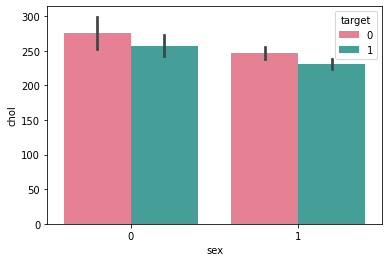

In [12]:
sns.barplot(data=HeartDf, x='sex', y='chol', hue='target', palette='husl')

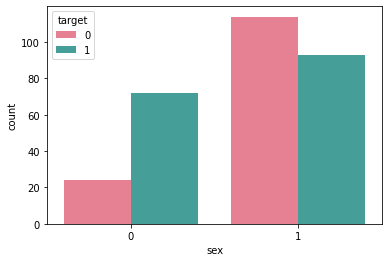

In [13]:
sns.countplot(data=HeartDf, x='sex', hue='target', palette='husl')

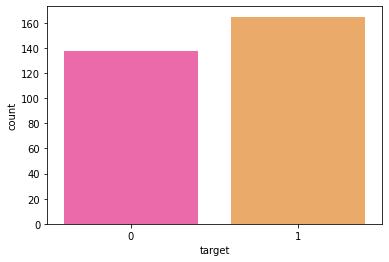

In [14]:

sns.countplot(data=HeartDf, x='target', palette='spring')

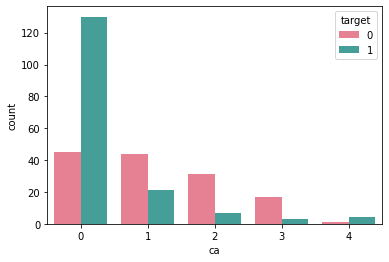

In [15]:
sns.countplot(data=HeartDf, x='ca', hue='target', palette='husl')

>  ca is the number of major vessels (0-3) colored by flourosopy ca has a negative corelation with the target i.e when ca will increase we witness a drop in heart diseases and vice versa.

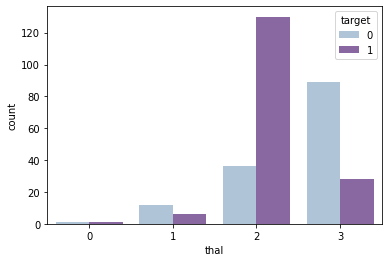

In [16]:
sns.countplot(x='thal',data=HeartDf, hue='target', palette='BuPu' )

#### Age Analysis

##### Age Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Distribution of age')

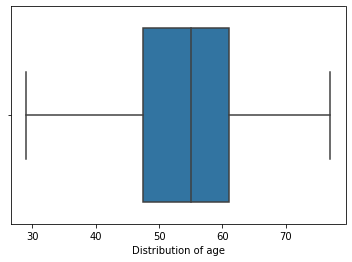

In [17]:
sns.boxplot('age',data=HeartDf) 
plt.xlabel('Distribution of age')

##### Conclusion:
*   Mean lying close to 56
*   Majority of Age distributed between 45-62



In [18]:
HeartDf['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

### Male VS Female Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


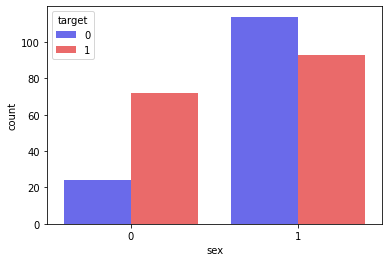

In [19]:
sns.countplot('sex', data=HeartDf, hue='target', palette='seismic')

### Analysis for data by Chest Pain type
> Plotting the Pain Frequency sorted by Chest Pain Type and labelled by Disease Carrier or not

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


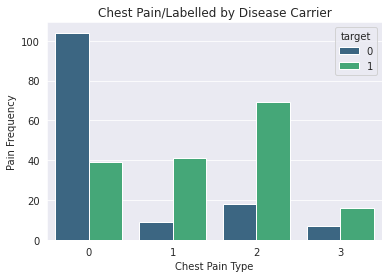

In [20]:
sns.set_style("darkgrid")
sns.countplot(HeartDf["cp"], hue=HeartDf["target"], palette="viridis")
plt.xlabel("Chest Pain Type")
plt.ylabel("Pain Frequency")
plt.title("Chest Pain/Labelled by Disease Carrier")
plt.show()

#### Conclusions:

* ##### For  <font color='darkblue'>Non-Diseased</font>  (target=0) the most common Chest Pain Type is:  <font color='red'>Typical Angina Pain</font>  


* ##### Majority if People having <font color='red'>A-Typical Angina Pain</font> and <font color='red'>Non-Anginal pain</font> have more chances of getting <font color='green'>Diseased</font>

# Preparing the Data

#### Preprocessing for the Dataset
> StandardScaler for spectific features

In [21]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
HeartDf[cols_to_scale] = std_scaler.fit_transform(HeartDf[cols_to_scale])

In [22]:
HeartDf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


#### Splitting Data into Features (X) and Label (Y)

In [23]:
X = HeartDf.drop(["target"], axis = 1)
Y = HeartDf["target"]
X.shape, Y.shape

((303, 13), (303,))

#### Splitting Data into train and test data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [25]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_trian: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (212, 13)
X_test:  (91, 13)
y_trian:  (212,)
y_test:  (91,)


#### Resuable Functions

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def evaluate_model(y_test, y_pred):
    print("Accuracy:", format(accuracy_score(y_test, y_pred)*100, ".2f"), "%")
    print("Precision:", format(precision_score(y_test, y_pred)*100, ".2f"), "%")
    print("Recall:", format(recall_score(y_test, y_pred)*100, ".2f"), "%")
    print("F1:", format(f1_score(y_test, y_pred)*100, ".2f"), "%")
    print("--------")
    print(classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

In [27]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

def plot_confusion_matrix(classifier, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap="BuPu")

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = logistic_model.predict(X_test)
logistic_accuracy, logistic_f1 = evaluate_model(y_test, y_pred)

Accuracy: 92.31 %
Precision: 92.31 %
Recall: 94.12 %
F1: 93.20 %
--------
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.92      0.94      0.93        51

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



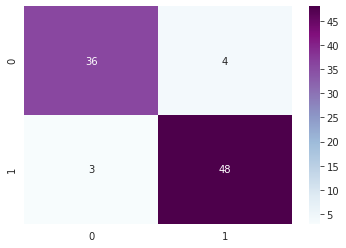

In [31]:
plot_confusion_matrix(logistic_model, y_test, y_pred)

## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
d_tree_model = DecisionTreeClassifier(criterion='entropy', random_state=36)
d_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=36, splitter='best')

In [34]:
# Predicting test results
y_pred = d_tree_model.predict(X_test)
decision_tree_accuracy, decision_tree_f1 = evaluate_model(y_test, y_pred)

Accuracy: 76.92 %
Precision: 84.09 %
Recall: 72.55 %
F1: 77.89 %
--------
              precision    recall  f1-score   support

           0       0.70      0.82      0.76        40
           1       0.84      0.73      0.78        51

    accuracy                           0.77        91
   macro avg       0.77      0.78      0.77        91
weighted avg       0.78      0.77      0.77        91



## Random Forest

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [36]:
n_estimators = [100, 300, 500, 800, 1000, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

forest = RandomForestClassifier(random_state = 1,
                                  n_estimators = 750,
                                  max_depth = 15, 
                                  min_samples_split = 5,  min_samples_leaf = 1) 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid_forest = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)

best_random_forest = grid_forest.fit(X_train, y_train)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 23.1min finished


In [37]:
best_random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

#### Build the best Random Forest Model

In [38]:
best_random_forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

best_random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [39]:
# Predicting test results
y_pred = best_random_forest.predict(X_test)
evaluate_model(y_test, y_pred)

Accuracy: 86.81 %
Precision: 88.24 %
Recall: 88.24 %
F1: 88.24 %
--------
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        40
           1       0.88      0.88      0.88        51

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



(0.8681318681318682, 0.8823529411764706)

#### Another way to get best n_estimators
> Trying out a wide range of splits/node from 10 to 200 with steps of 10, for each value it will train, get preds and get mean error



In [96]:
estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
error_rate = []
for i in estimators:
    rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=i,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
    rfc.fit(X_train,y_train)
    pred_i = rfc.predict(X_test)
    error_rate.append(np.mean(y_test != pred_i))

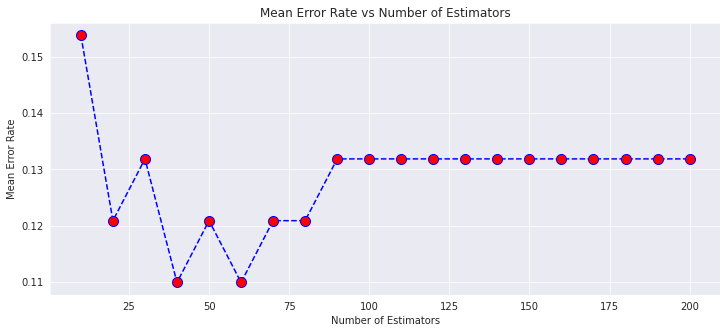

In [97]:
# Visualizing and tracking the Error Rate for each number of splits per node (estimators number)
plt.figure(figsize=(12,5))
plt.plot(estimators,error_rate,color="blue", ls="--",marker="o", markerfacecolor="red", markersize=10)
plt.title("Mean Error Rate vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Error Rate")
plt.show()

#### Conclusion:
> The number of estimators that will get least errors: 30, 60

In [100]:
best_random_forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
best_random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [101]:
# Predicting test results
y_pred = best_random_forest.predict(X_test)
random_forest_accuracy, random_forest_f1 = evaluate_model(y_test, y_pred)

Accuracy: 89.01 %
Precision: 90.20 %
Recall: 90.20 %
F1: 90.20 %
--------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        40
           1       0.90      0.90      0.90        51

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91



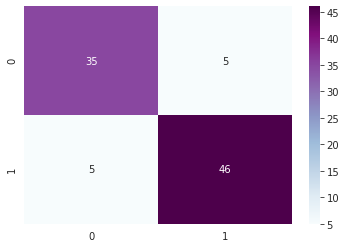

In [102]:
plot_confusion_matrix(best_random_forest, y_test, y_pred)

## K-Nearest Neighbors

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [109]:
y_pred = knn_model.predict(X_test)
evaluate_model(y_test, y_pred)

Accuracy: 83.52 %
Precision: 84.62 %
Recall: 86.27 %
F1: 85.44 %
--------
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        40
           1       0.85      0.86      0.85        51

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



(0.8351648351648352, 0.854368932038835)

### Trying out more than K-value
> Creating a wide range from 1 to 39, for each one we'll train the model get predictions and get mean error

In [110]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_test != pred_i))

Text(0, 0.5, 'Mean Error Rate')

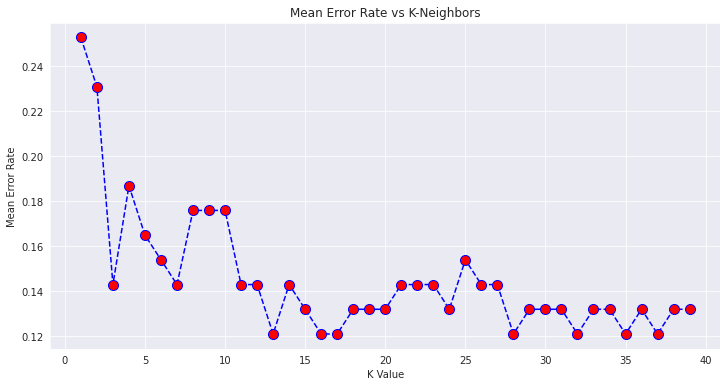

In [115]:
# Visualizing and tracking the Error Rate for each K near value
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error_rate,color="blue",ls="--",marker="o", markerfacecolor="red",markersize=10)
plt.title("Mean Error Rate vs K-Neighbors")
plt.xlabel("K Value")
plt.ylabel("Mean Error Rate")

#### Conclusion
> It's clear that the least mean error is at K-value= 13, 16, 17, 28, 32, 35, 37

#### Build the best KNN Model

In [112]:
# Create KNN classifier
knn_best_model = KNeighborsClassifier(n_neighbors = 13, metric='minkowski', p=2)
# Fit the classifier to the data
knn_best_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [113]:
y_pred = knn_best_model.predict(X_test)
knn_accuracy, knn_f1 = evaluate_model(y_test, y_pred)

Accuracy: 87.91 %
Precision: 85.71 %
Recall: 94.12 %
F1: 89.72 %
--------
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        40
           1       0.86      0.94      0.90        51

    accuracy                           0.88        91
   macro avg       0.89      0.87      0.88        91
weighted avg       0.88      0.88      0.88        91



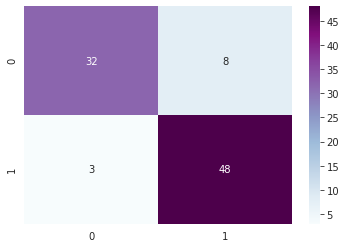

In [114]:
plot_confusion_matrix(knn_best_model, y_test, y_pred)

## SVM

In [116]:
# Fitting SVM to Training Set
from sklearn.svm import SVC

In [117]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [118]:
y_pred = svm_model.predict(X_test)

In [119]:
svm_accuracy, svm_f1 =  evaluate_model(y_test, y_pred)

Accuracy: 91.21 %
Precision: 90.57 %
Recall: 94.12 %
F1: 92.31 %
--------
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        40
           1       0.91      0.94      0.92        51

    accuracy                           0.91        91
   macro avg       0.91      0.91      0.91        91
weighted avg       0.91      0.91      0.91        91



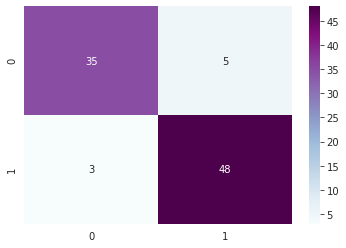

In [120]:
plot_confusion_matrix(svm_model, y_test, y_pred)

## Naive Bayes

In [121]:
from sklearn.naive_bayes import GaussianNB

In [122]:
NB = GaussianNB()
naive_model = NB.fit(X_train, y_train)

In [123]:
y_pred = naive_model.predict(X_test)
nb_accuracy, nb_f1 = evaluate_model(y_test, y_pred)

Accuracy: 87.91 %
Precision: 90.00 %
Recall: 88.24 %
F1: 89.11 %
--------
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.90      0.88      0.89        51

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



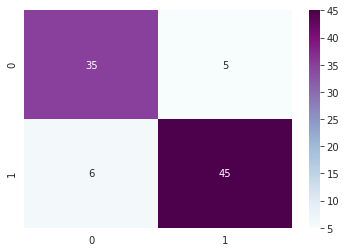

In [124]:
plot_confusion_matrix(naive_model, y_test, y_pred)

# Results

### Comparing Results of Accuracy

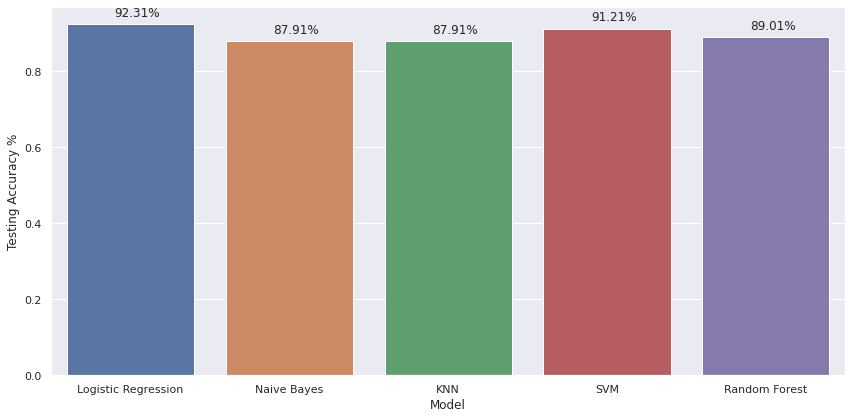

In [130]:
methods = ["Logistic Regression","Naive Bayes", "KNN", "SVM", "Random Forest"]
accuracy = [logistic_accuracy, nb_accuracy, knn_accuracy, svm_accuracy, random_forest_accuracy]

sns.set()
plt.figure(figsize=(12,6))
plt.ylabel("Testing Accuracy %")
plt.xlabel("Model")
sns.barplot(x=methods, y=accuracy, palette="deep")

for idx, method in enumerate(methods):
    plt.text(idx -0.1, accuracy[idx]+0.02, "{:.2f}%".format(accuracy[idx]*100))
    
plt.tight_layout()

#### Comparing Results of F1

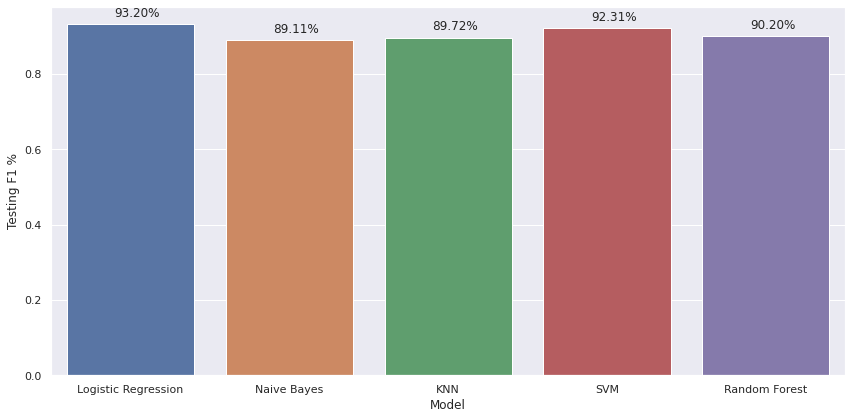

In [131]:
methods = ["Logistic Regression","Naive Bayes", "KNN", "SVM", "Random Forest"]
accuracy = [logistic_f1, nb_f1, knn_f1, svm_f1, random_forest_f1]

sns.set()
plt.figure(figsize=(12,6))
plt.ylabel("Testing F1 %")
plt.xlabel("Model")
sns.barplot(x=methods, y=accuracy, palette="deep")

for idx, method in enumerate(methods):
    plt.text(idx -0.1, accuracy[idx]+0.02, "{:.2f}%".format(accuracy[idx]*100))
    
plt.tight_layout()

In [125]:
logistic_accuracy, logistic_f1 

(0.9230769230769231, 0.9320388349514563)

In [126]:
svm_accuracy, svm_f1

(0.9120879120879121, 0.923076923076923)

In [127]:
knn_accuracy, knn_f1

(0.8791208791208791, 0.897196261682243)

In [128]:
nb_accuracy, nb_f1

(0.8791208791208791, 0.8910891089108911)

In [129]:
random_forest_accuracy, random_forest_f1

(0.8901098901098901, 0.9019607843137255)